In [2]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [4]:
X, _ = make_blobs(n_samples=500, centers=3, n_features=2, random_state=42)

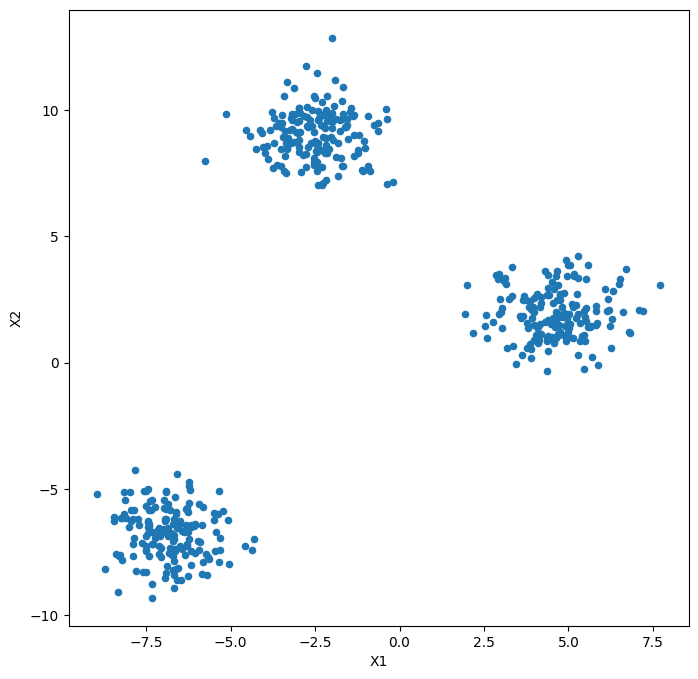

In [9]:
df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1]))
fig, ax = plt.subplots(figsize=(8,8))
df.plot(ax=ax, kind='scatter', x='x1', y='x2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

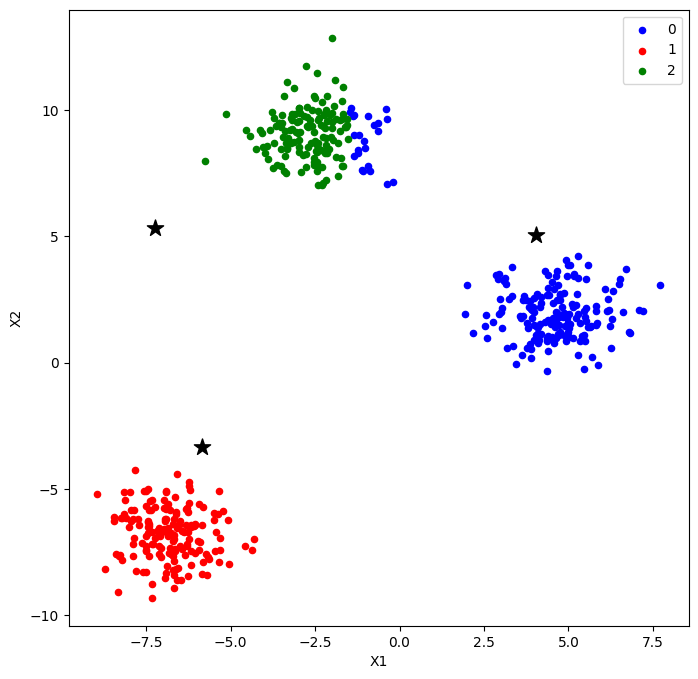

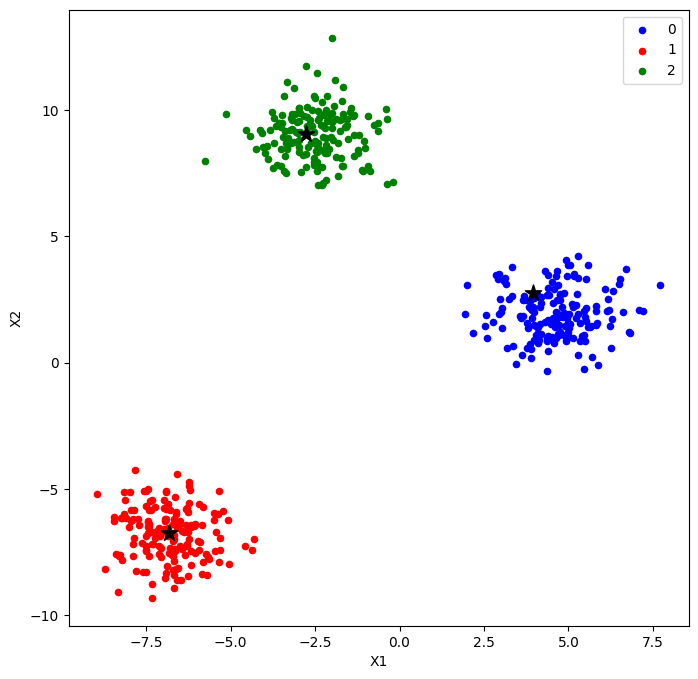

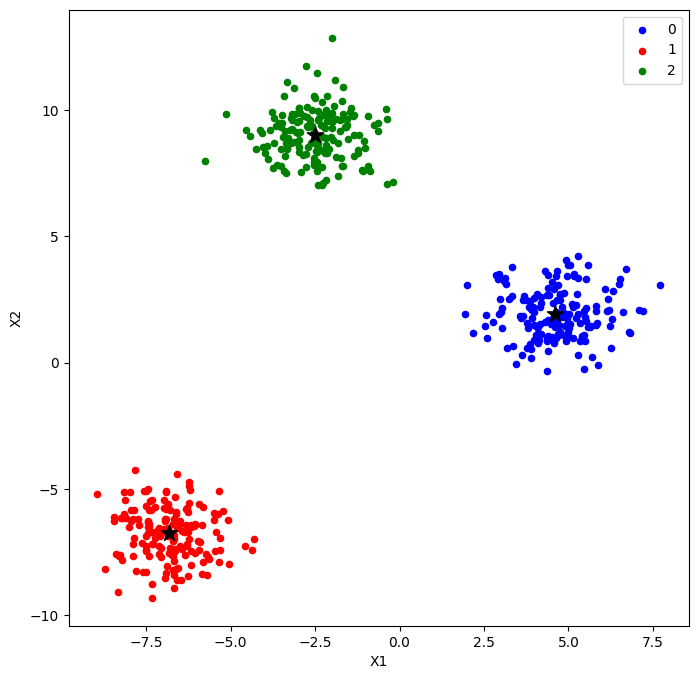

In [35]:
def init_centriods(k, X):
    out = []
    for _ in range(k):
        centroid_x1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
        centroid_x2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
        out.append([centroid_x1, centroid_x2])
    
    return np.array(out)


def euclidean_distance(a,b):
    return np.sqrt(np.sum(np.square(a-b)))


def assign_cluster(k, X, centroids):
    cluster = [-1]*len(X)
    for i in range(len(X)):
        #Distance of particular point
        dist = []
        for j in range(k):
            dist.append(euclidean_distance(X[i], centroids[j]))
        #Select minimum distance between centroid and point & assign cluster
        idx = np.argmin(dist)
        cluster[i] = idx
    
    return np.array(cluster)


def compute_centroids(k, X, clusters):
    centroids = []
    for i in range(k): #loop over clusters
        arr = []
        for j in range(len(X)): #loop over data points
            if clusters[j] == i: #if current point belongs to cluster then append to new array to take the mean to give us the centroid
                arr.append(X[j])
        centroids.append(np.mean(arr, axis=0))
    
    return np.array(centroids)

def measure_change(prev_centroids, new_centroids):
    out = 0
    for a,b in zip(prev_centroids, new_centroids):
        out+= euclidean_distance(a,b)

    return out

def show_clusters(X, cluster, centroids):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=cluster))
    colors = {0:'blue', 1:'red', 2:'green'}
    fig, ax = plt.subplots(figsize=(8,8))
    for key, group in df.groupby('label'):
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
    ax.scatter(centroids[:,0], centroids[:,1], marker='*', s=150, c='#000000')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()


def k_means(k, X):
    prev_centroids = init_centriods(k, X)
    cluster = [0] * len(X)
    centroid_change = 100
    
    while centroid_change > 0.001:
        cluster = assign_cluster(k, X, prev_centroids)
        show_clusters(X, cluster, prev_centroids)
        new_centroids = compute_centroids(k, X, cluster)
        centroid_change = measure_change(new_centroids, prev_centroids)
        prev_centroids = new_centroids

    return cluster

cluster = k_means(3, X)